## ***`PREDICTION OF DEMAND FOR SHARED BIKES`*** - A Multiple Linear Regression Model

*A US bike sharing company Boom Bikes has recently suffered considerable changes in their revenue. They have contacted a consulting company to understand the factors on which the demand for these shared bikes depends. the company wants to know the following:***

1. which variable(s) are significant in predicting the demand for shared bikes.
2. how well those variables descibe the bike demand

### Reading and Understanding Data

In [1]:
#Importing required libraries for initial analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#display options

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

pd.options.display.float_format='{:.4f}'.format

sns.set_style("whitegrid")
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 24

#Handling warnings

import warnings
warnings.filterwarnings("ignore")


***Reading the cvs file to dataframe 'bikes' and checking first few rows***

In [2]:
#filepath = C:\Users\RAJEEV\Documents\DATA_SCIENCE_UPGRAD\MACHINE_LEARNING\BIKE_SHARING_ASSIGNMENT\day.csv

bikes = pd.read_csv("day.csv")

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


***checking the shape of dataframe***

In [3]:
bikes.shape

#dataframe has 730 rows and 16 columns

(730, 16)

***checking the datatype info of dataframe***

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- `no null values found.`
- `11 columns with int datatype, 4 columns with float datatype and 1 column with object datatype`

***checking the statistical info of numerical columns***

In [5]:
bikes.describe()

#below shows the statistical information like std, min, max, percentiles of all numerical columns


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9959,0.6904,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0003,0.4626,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


***Dropping unwanted variables***

In [6]:
# instant --> index column
# dteday --> year, month and weeekday present. so dropping dteday
# casual and registered ---> the total count of these two columns are present in 'cnt'


drop_cols = ['instant','dteday','casual','registered']

bikes.drop(labels=drop_cols, axis = 1, inplace = True)

In [7]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,985
1,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,801
2,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,1349
3,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,1562
4,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,1600


In [8]:
bikes.shape

(730, 12)

### ***Mapping Categorical variables***

1. season
2. mnth
3. weekday
4. weathersit


- holiday, yr and workingday are boolean in nature; i.e. values are already in 0 and 1. so we leave it as it is.

In [9]:
#creating dict for each categorical variables to map

#---------- season dict ---------- 

season_dict = {1:"spring",2:"summer",3:"fall",4:"winter"}

#---------- mnth dict ---------- 

mnth_dict = {1:"january",2:"february",3:"march",4:"apil",5:"may",6:"june",7:"july",8:"august",9:"september",
            10:"october",11:"november",12:"december"}

#---------- weekday dict ---------- 

weekday_dict = {0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}

#---------- weathersit ---------- 

weather_dict = {1:"clear",2:"cloudy",3:"light rain",4:"heavy rain"}


In [10]:
#mapping categorical variables with corresponding dict values.

bikes.season = bikes.season.map(season_dict) # --> season

bikes.mnth = bikes.mnth.map(mnth_dict) # --> mnth

bikes.weekday = bikes.weekday.map(weekday_dict) # --> weekday

bikes.weathersit = bikes.weathersit.map(weather_dict) # --> weathersit

In [11]:
#checking count of all season

bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
#checking count of all month

bikes.mnth.value_counts()

august       62
december     62
may          62
october      62
march        62
january      62
july         62
november     60
september    60
apil         60
june         60
february     56
Name: mnth, dtype: int64

In [13]:
#checking count of all weekday

bikes.weekday.value_counts()

monday       105
tuesday      105
friday       104
wednesday    104
saturday     104
sunday       104
thursday     104
Name: weekday, dtype: int64

In [14]:
#checking count of all weather situation

bikes.weathersit.value_counts()

clear         463
cloudy        246
light rain     21
Name: weathersit, dtype: int64

In [15]:
#checking first few rows after mapping

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,cloudy,14.1108,18.1812,80.5833,10.7499,985
1,spring,0,january,0,tuesday,1,cloudy,14.9026,17.6869,69.6087,16.6521,801
2,spring,0,january,0,wednesday,1,clear,8.0509,9.4703,43.7273,16.6367,1349
3,spring,0,january,0,thursday,1,clear,8.2000,10.6061,59.0435,10.7398,1562
4,spring,0,january,0,friday,1,clear,9.3052,11.4635,43.6957,12.5223,1600


In [16]:
#checking the dtypes of all variables again

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualising - Performing EDA on Categorical and Numerical variables

***Categorical Variables***

- season
- yr ---> represents year. 0 is 2018 and 1 is 2019
- mnth ---> month
- holiday --> 0 specifies not holiday, 1 specifies holiday
- weekday --> 1 represents working day ; 0 represents non-working day
- workingday
- weathersit

***Numerical Variables***
- temp
- hum
- windspeed

In [17]:
#defining a function to perform univariate and bivariate analaysis on categorical variables

def uni_bi_cat(var):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
    fig.suptitle("Analysis on "+var, fontsize=24, weight='bold', color='black')
    
    #----------------------------- UNIVARIATE -------------------------------
    
    sns.countplot(y=var, data=bikes, ax=ax[0], color="darkslateblue")
    ax[0].set_title("Frequency Distribution", fontsize=14, weight='bold', color='midnightblue')
    
    
    #----------------------------- BIVARIATE -------------------------------
    
    bikes.groupby(by=var)['cnt'].sum().plot.barh(color='indianred', edgecolor='black',ax=ax[1])
    ax[1].set_title("Distribution w.r.t cnt (sum)", fontsize=14, weight='bold', color='darkred')
    
    

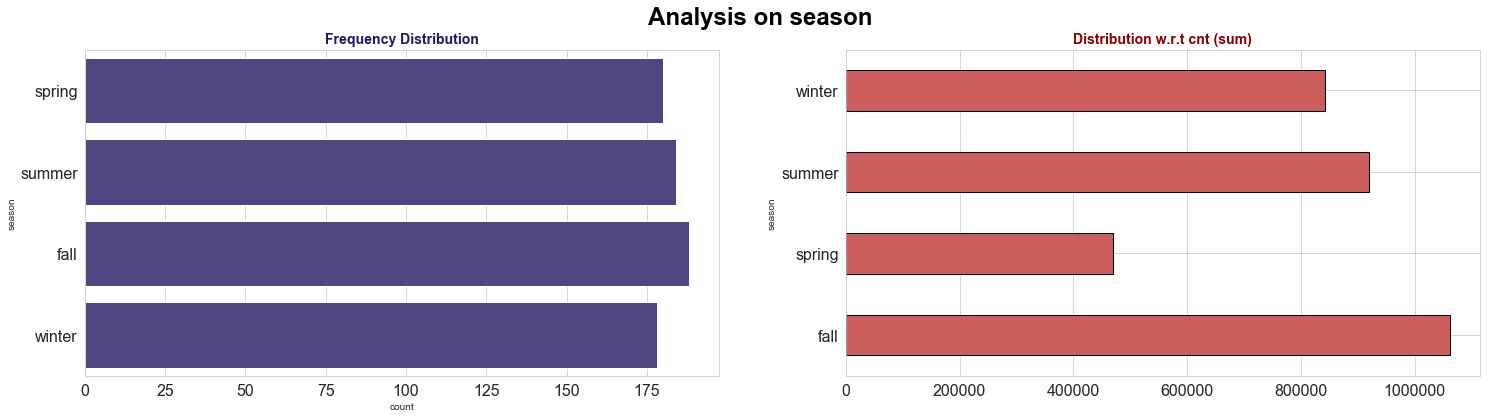

In [18]:
uni_bi_cat("season")

#fall has the highest total of bikes shared

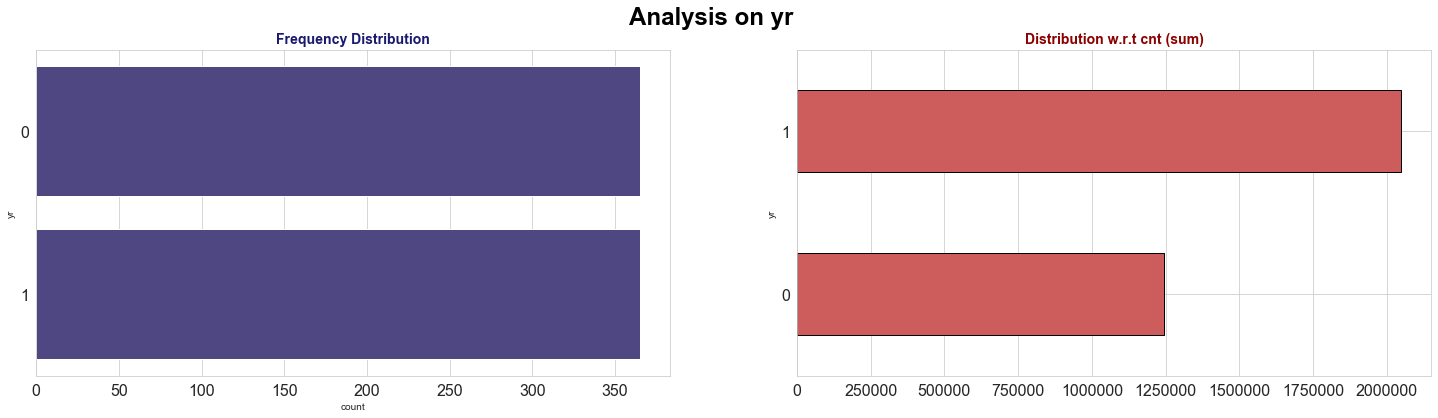

In [19]:
uni_bi_cat("yr")

#1 represents 2019. 2019 has the highest total of bikes shared compared 0; which is 2018

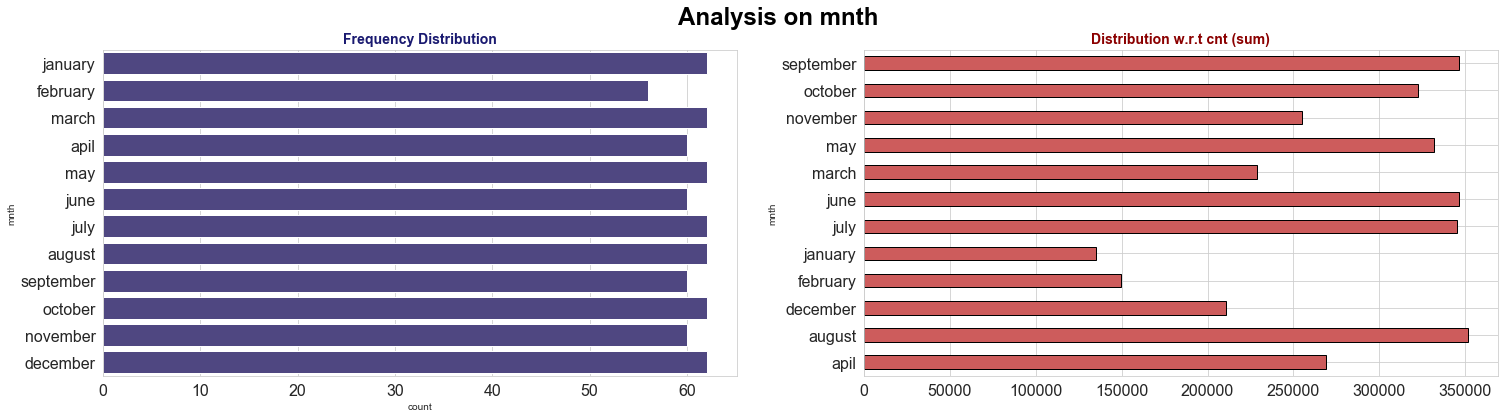

In [20]:
uni_bi_cat("mnth")

#representing months from January to December. August had the highest total of bikes shared followed by September.

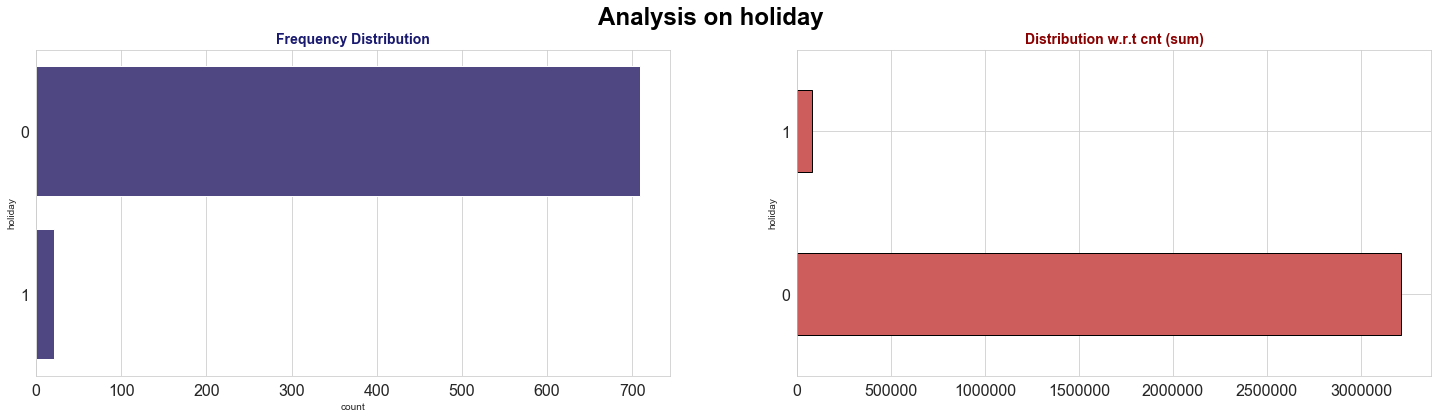

In [21]:
uni_bi_cat("holiday")


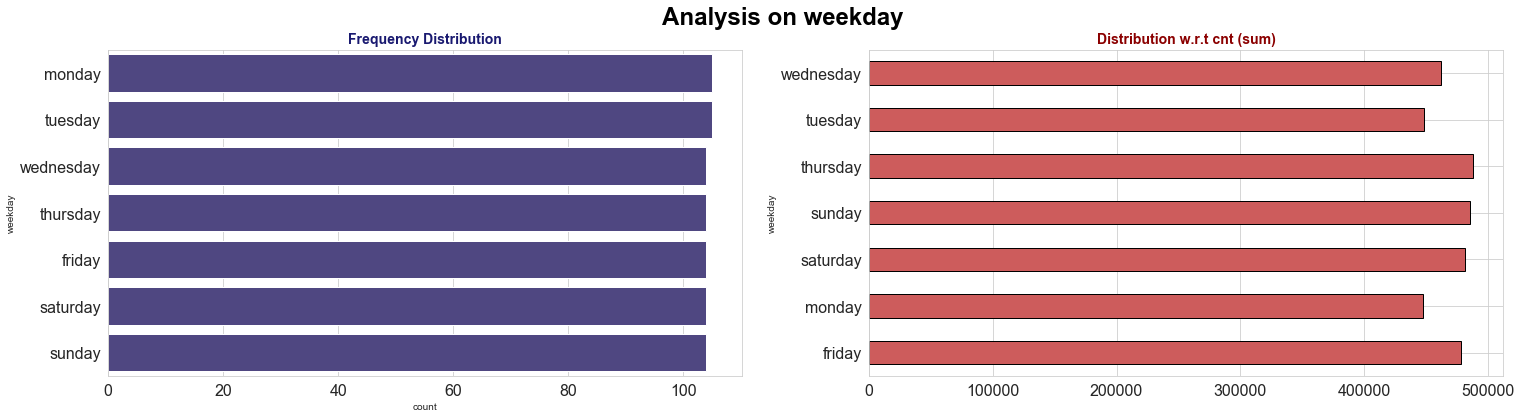

In [22]:
uni_bi_cat("weekday")

#representing Monday to Sunday. All weekdays show a good total in bikes shared. Weekday doesn’t seem to affect the 
#target variable ‘cnt’

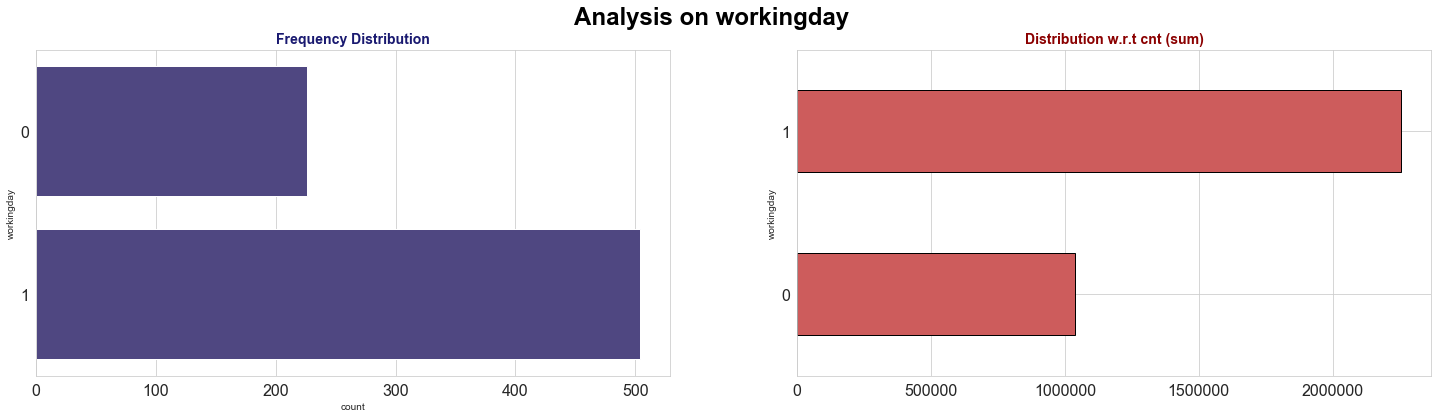

In [23]:
uni_bi_cat("workingday")

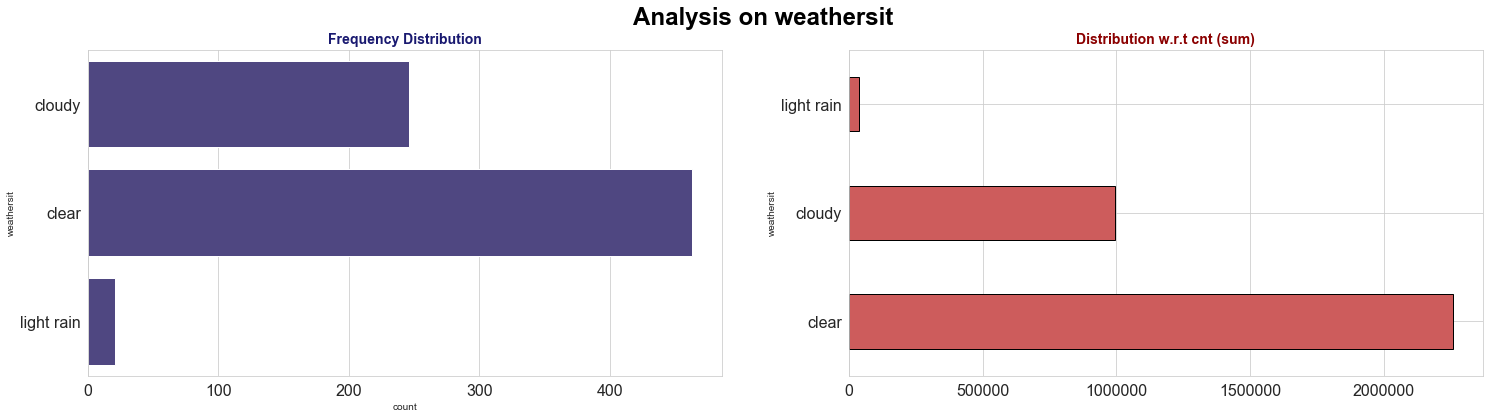

In [24]:
uni_bi_cat("weathersit")

#representing weather situation (clear / cloudy / light rain / heavy rain). More bikes are shared on a clear day

In [25]:
#defining a function to perform univariate and bivariate analaysis on numerical variables

def uni_bi_cont(var):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    fig.suptitle("Analysis on "+var, fontsize=24, weight='bold', color='black')
    
    #----------------------------- UNIVARIATE -------------------------------
    
    sns.boxplot(bikes[var], color='teal',ax=ax[0])
    ax[0].set_title("Distribution of "+var, fontsize=14)
    
    
    #----------------------------- BIIVARIATE -------------------------------
    
    sns.scatterplot(x=var, y='cnt', data=bikes, color='crimson')
    ax[1].set_title("Distribution of "+var+" w.r.t cnt", fontsize=14)
    

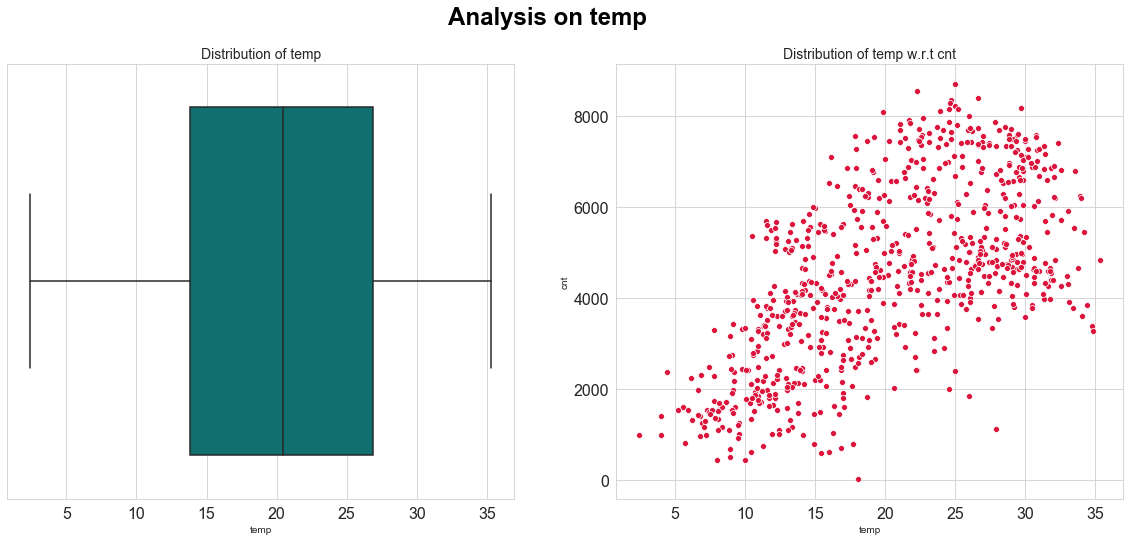

In [26]:
uni_bi_cont('temp')

#implies a linear relationship with respect to cnt

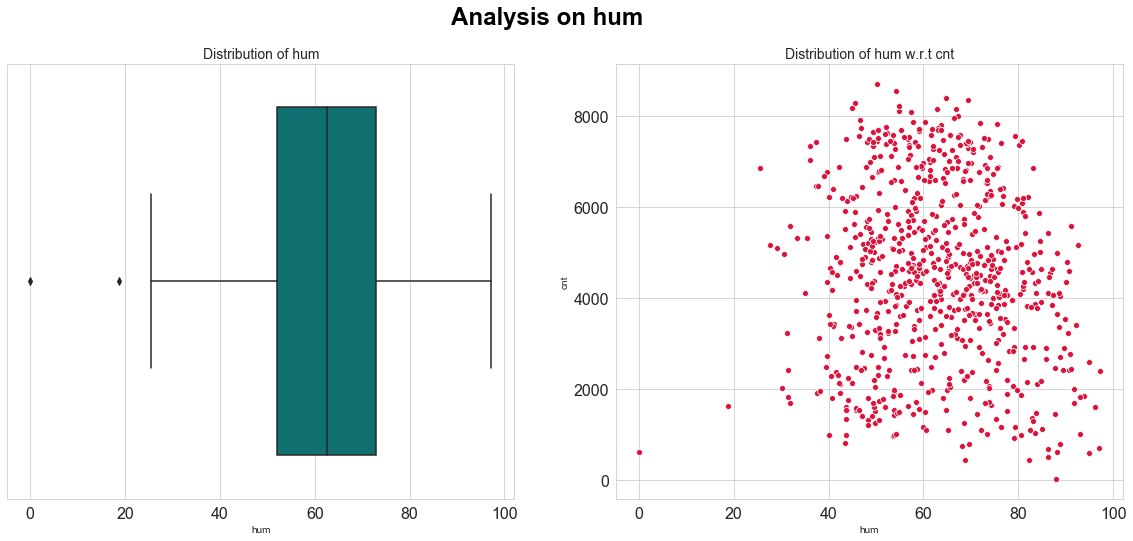

In [27]:
uni_bi_cont('hum')

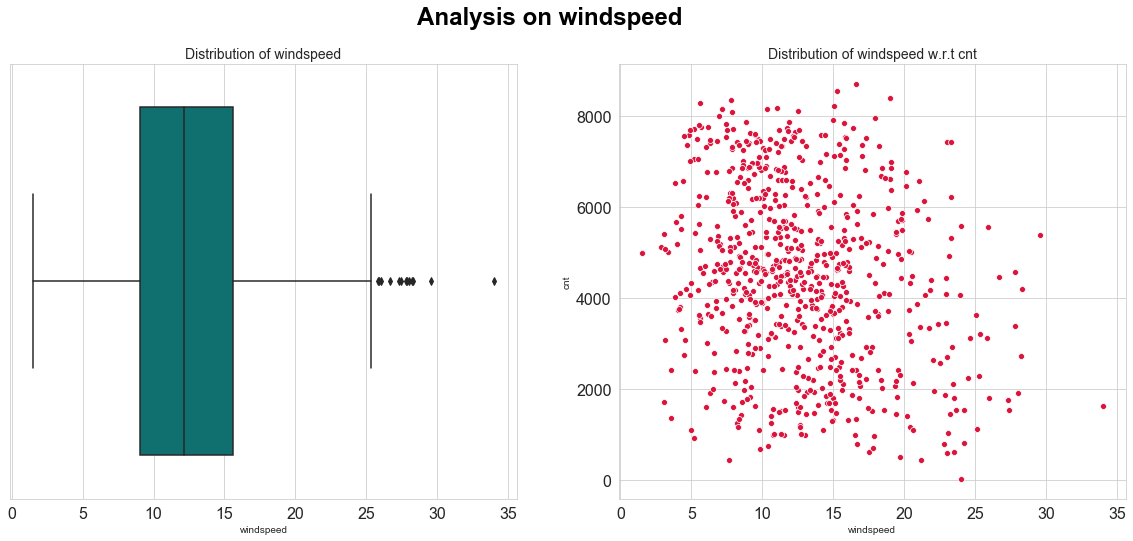

In [28]:
uni_bi_cont('windspeed')

#outliers visible. 

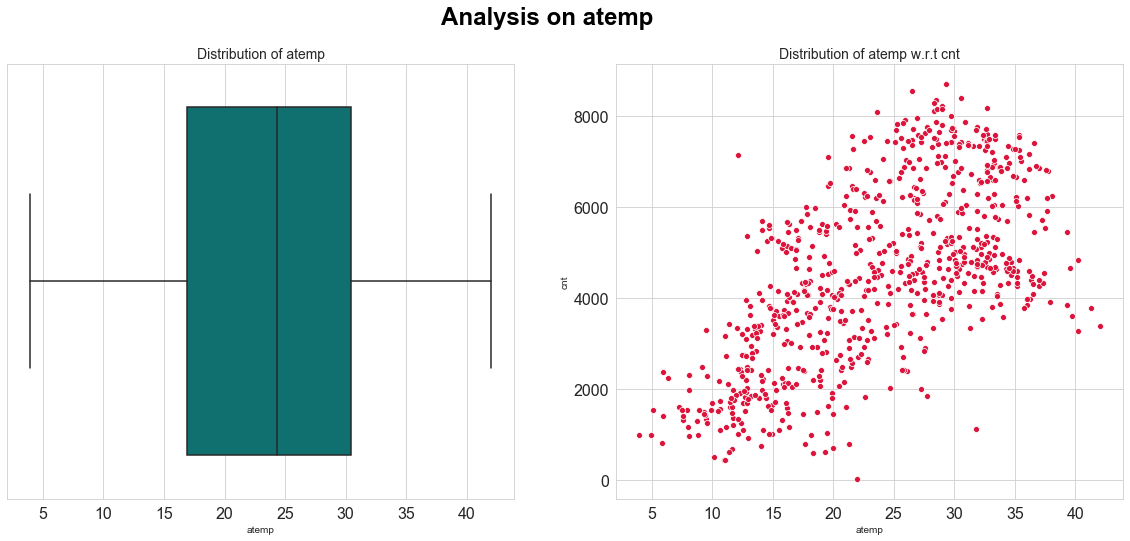

In [29]:
uni_bi_cont('atemp')

#implies a linear relationship with cnt

### Multi-variate analysis

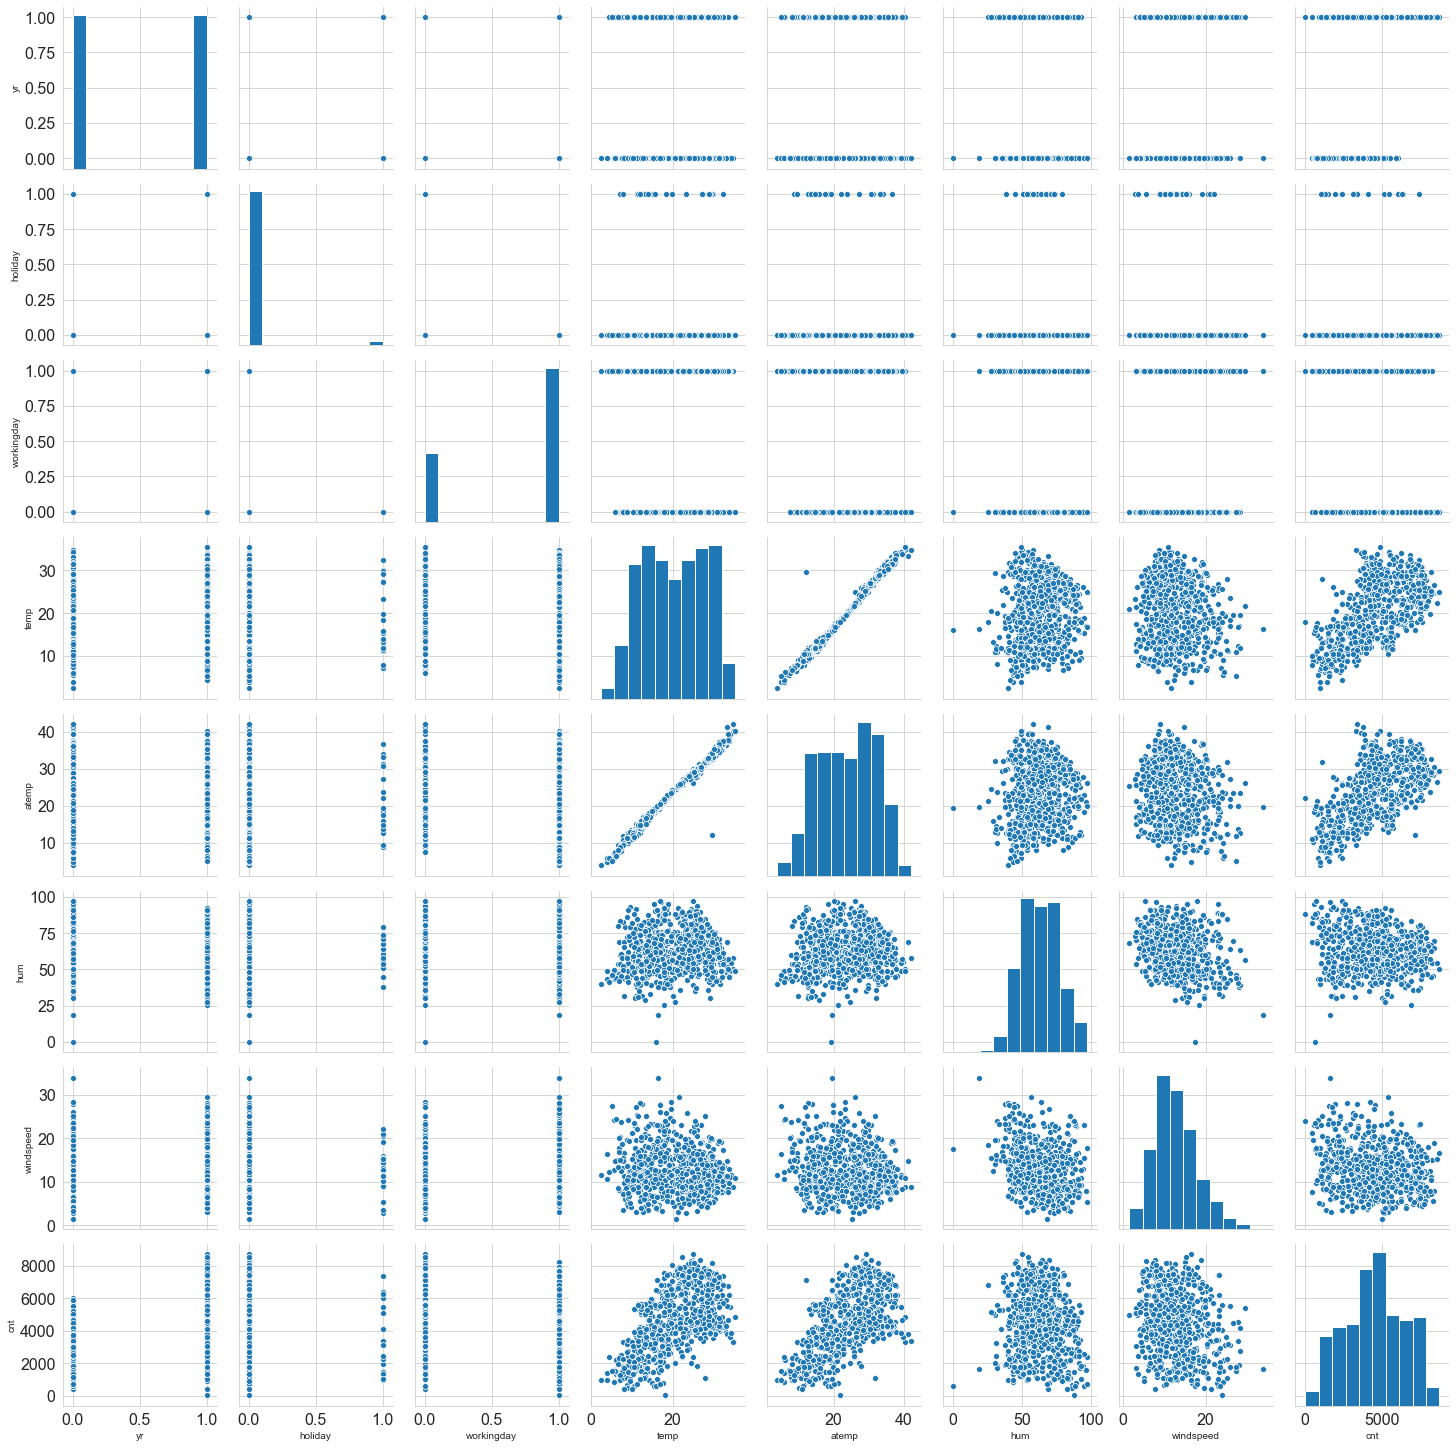

In [30]:
#pairplot of features with respect to each other

sns.pairplot(bikes)
plt.show()

***Correlation***

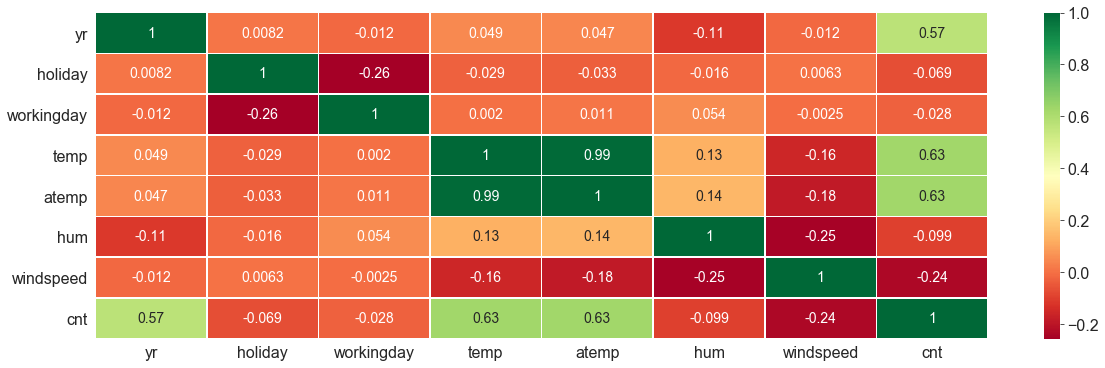

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(bikes.corr(), annot = True, cmap = 'RdYlGn', linewidth=0.5, annot_kws={"size":14})
plt.show()

In [32]:
#Since 'temp' and 'atemp' are highly correlated, dropping 'atemp'

bikes.drop('atemp', axis = 1, inplace=True)

In [33]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,cloudy,14.1108,80.5833,10.7499,985
1,spring,0,january,0,tuesday,1,cloudy,14.9026,69.6087,16.6521,801
2,spring,0,january,0,wednesday,1,clear,8.0509,43.7273,16.6367,1349
3,spring,0,january,0,thursday,1,clear,8.2000,59.0435,10.7398,1562
4,spring,0,january,0,friday,1,clear,9.3052,43.6957,12.5223,1600


In [34]:
bikes.shape

#now the dataframe has 730 rows and 11 columns only.

(730, 11)

### Creating Dummy variables

- Dummy variables will be created for below categorical variables
> 1. season
> 2. mnth
> 3. weekday
> 4. weathersit

In [35]:

#getting dummies using pd.get_dummies and setting dropping_first = True in order to get k-1 dummies.

season_dummy = pd.get_dummies(bikes['season'], drop_first=True)

mnth_dummy = pd.get_dummies(bikes['mnth'], drop_first = True)

weekday_dummy = pd.get_dummies(bikes['weekday'], drop_first = True)

weather_dummy = pd.get_dummies(bikes['weathersit'], drop_first = True)


In [36]:
# season dataframe with dummy variables

season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
# month dataframe with dummy variables

mnth_dummy.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [38]:
# weekday dataframe with dummy variables

weekday_dummy.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [39]:
# weathersit dataframe with dummy variables

weather_dummy.head()

,cloudy,light rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [40]:
#concatenating dataframes - bikes, season_dummy, mnth_dummy, weekday_dummy and weather_dummy

bikes = pd.concat([bikes, season_dummy, mnth_dummy, weekday_dummy, weather_dummy], axis = 1)

In [41]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
0,spring,0,january,0,monday,1,cloudy,14.1108,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,january,0,tuesday,1,cloudy,14.9026,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,january,0,wednesday,1,clear,8.0509,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thursday,1,clear,8.2000,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,clear,9.3052,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#dropping the columns after the creation of corresponding dummy variables

cols_list = ['season','mnth','weekday','weathersit']
bikes.drop(labels=cols_list, axis = 1, inplace = True)

In [43]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
0,0,0,1,14.1108,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.9026,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.0509,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.2000,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.3052,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
bikes.shape

(730, 29)

In [45]:
bikes.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,0.5000,0.0288,0.6904,20.3193,62.7652,12.7636,4508.0068,0.2466,0.2521,0.2438,0.0849,0.0849,0.0767,0.0849,0.0849,0.0822,0.0849,0.0849,0.0822,0.0849,0.0822,0.1438,0.1425,0.1425,0.1425,0.1438,0.1425,0.3370,0.0288
std,0.5003,0.1673,0.4626,7.5067,14.2376,5.1958,1936.0116,0.4313,0.4345,0.4297,0.2790,0.2790,0.2663,0.2790,0.2790,0.2748,0.2790,0.2790,0.2748,0.2790,0.2748,0.3512,0.3498,0.3498,0.3498,0.3512,0.3498,0.4730,0.1673
min,0.0000,0.0000,0.0000,2.4243,0.0000,1.5002,22.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,13.8119,52.0000,9.0417,3169.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.5000,0.0000,1.0000,20.4658,62.6250,12.1253,4548.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,26.8806,72.9896,15.6256,5966.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
max,1.0000,1.0000,1.0000,35.3283,97.2500,34.0000,8714.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Splitting dataset to train and test set & Re-scaling.

In [46]:
#Importing required libraries

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [47]:
#set seed value to generate the same split within the dataset.

np.random.seed(0) 
bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
scaler = MinMaxScaler()

In [49]:
#scaling all variables except binary variables and dummy variables

col_vars = ['temp','hum','windspeed','cnt'] #variables to be scaled

bikes_train[col_vars] = scaler.fit_transform(bikes_train[col_vars])

In [50]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
653,1,0,1,0.5099,0.5754,0.3008,0.8642,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.8152,0.7256,0.2647,0.8277,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.4424,0.6402,0.2553,0.4653,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.2451,0.4981,0.6631,0.2041,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.3957,0.5045,0.1885,0.4830,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [51]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5078,0.0255,0.7118,0.5373,0.6504,0.3208,0.5136,0.2431,0.2451,0.2490,0.0961,0.0843,0.0667,0.0882,0.0765,0.0745,0.0980,0.0843,0.0863,0.0863,0.0804,0.1549,0.1294,0.1373,0.1431,0.1529,0.1353,0.3431,0.0294
std,0.5004,0.1578,0.4534,0.2258,0.1459,0.1698,0.2246,0.4294,0.4306,0.4329,0.2950,0.2781,0.2497,0.2839,0.2660,0.2629,0.2977,0.2781,0.2810,0.2810,0.2722,0.3622,0.3360,0.3445,0.3506,0.3603,0.3424,0.4752,0.1691
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3399,0.5386,0.1992,0.3564,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.5405,0.6537,0.2968,0.5186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7352,0.7548,0.4144,0.6847,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


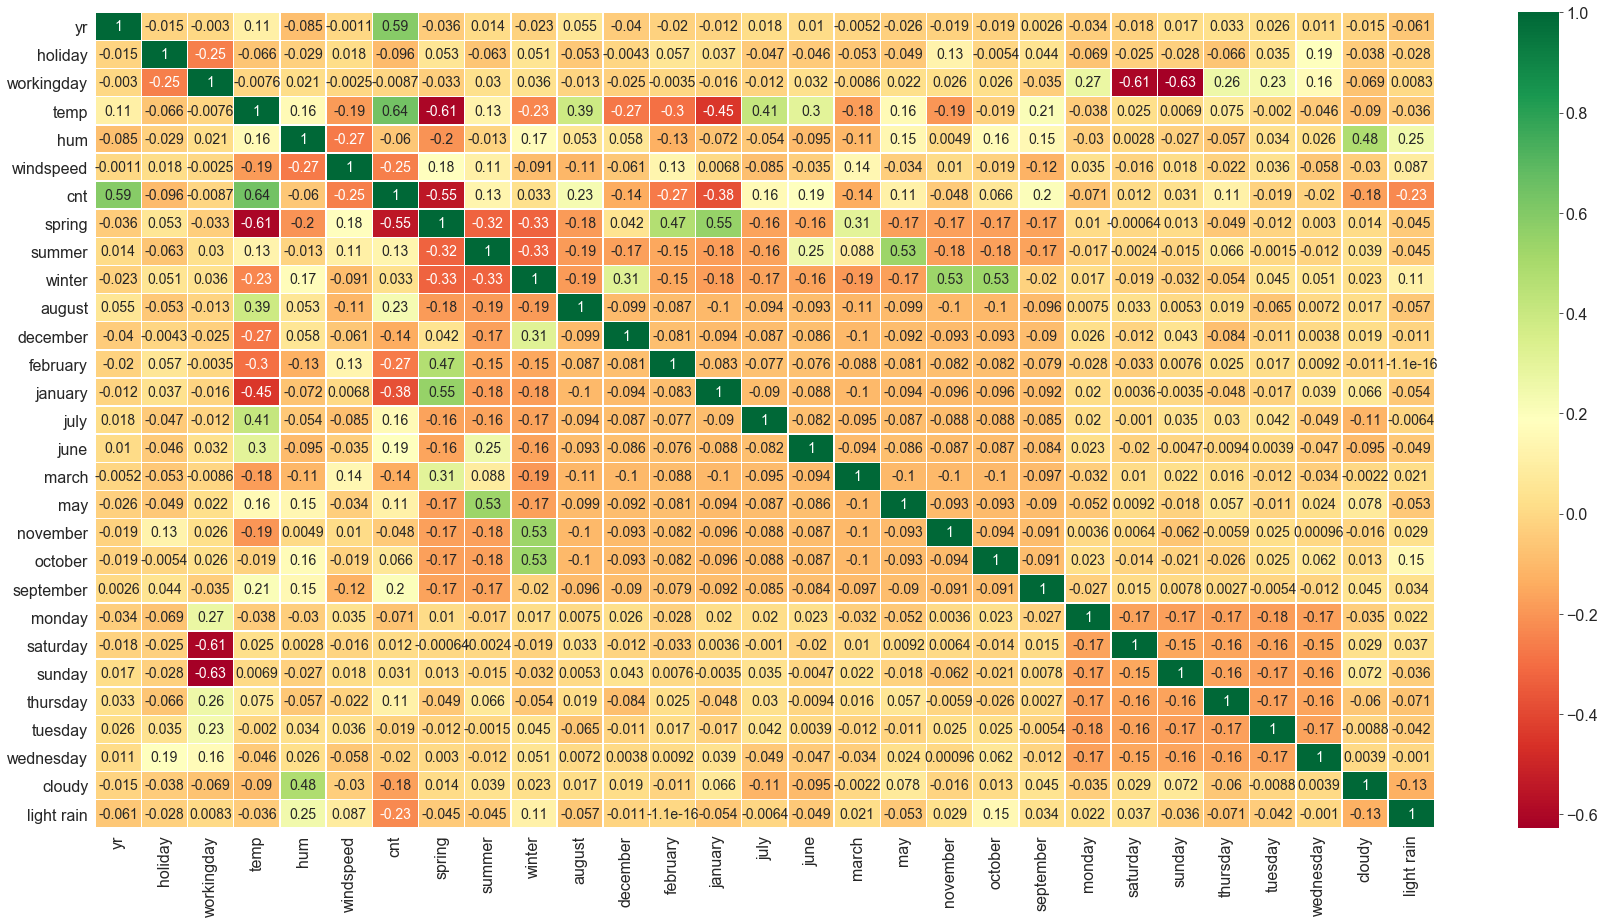

In [52]:
# checking for correlation between variables using heatmap

plt.figure(figsize=(30,15))
sns.heatmap(bikes_train.corr(), annot = True, cmap = "RdYlGn", linewidth=0.5, annot_kws={"size":14})
plt.show()


***Divind the dataset to X and y sets***

In [53]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

***Model building using RFE***

In [55]:
#importing required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 9),
 ('december', True, 1),
 ('february', False, 2),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 14),
 ('may', False, 6),
 ('november', True, 1),
 ('october', False, 11),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', False, 4),
 ('sunday', False, 5),
 ('thursday', False, 12),
 ('tuesday', False, 7),
 ('wednesday', False, 10),
 ('cloudy', True, 1),
 ('light rain', True, 1)]

In [58]:
cols_rfe = X_train.columns[rfe.support_]

cols_rfe

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'december', 'january', 'july', 'november', 'september',
       'cloudy', 'light rain'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['workingday', 'august', 'february', 'june', 'march', 'may', 'october',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### ***Model 1 : Building a model with all variables retrieved using RFE***

In [60]:
X_train_rfe = X_train[cols_rfe]

In [61]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        21:09:38   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

***`Since p values of all variables are less than 0.05, we check the vif values for more analysis.`***

In [64]:
#creating a dataframe to store the vif values

vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

,Features,VIF
0,const,82.4800
6,spring,5.2700
3,temp,4.4200
8,winter,3.8300
7,summer,2.7600
4,hum,1.9300
12,november,1.7600
10,january,1.6800
14,cloudy,1.5700
9,december,1.4900


In [65]:
#dropping 'spring' column since it has the highest vif value of 5.27

#creating a new dataframe

X_train_new = X_train_rfe.drop('spring', axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()

lm.params

const         0.2563
yr            0.2289
holiday      -0.0947
temp          0.5540
hum          -0.1723
windspeed    -0.1969
summer        0.0716
winter        0.1387
december     -0.0312
january      -0.0476
july         -0.0454
november     -0.0310
september     0.0899
cloudy       -0.0530
light rain   -0.2418
dtype: float64

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.54e-188
Time:                        21:09:39   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.912      0.0

### Model 2
***`Dropping 'november' since it has a high p value of 0.095`***

In [67]:
X_train_new = X_train_new.drop('november', axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()

lm.params

const         0.2498
yr            0.2290
holiday      -0.0996
temp          0.5621
hum          -0.1718
windspeed    -0.1969
summer        0.0728
winter        0.1275
december     -0.0201
january      -0.0432
july         -0.0464
september     0.0927
cloudy       -0.0526
light rain   -0.2392
dtype: float64

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.25e-189
Time:                        21:09:40   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2498      0.029      8.751      0.0

### Model 3
***`Dropping 'december' with a p value of 0.215`***

In [69]:
X_train_new = X_train_new.drop('december', axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()

In [70]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.03e-190
Time:                        21:09:40   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2444      0.028      8.658      0.0

***Since all p values are less than 0.05, Checking VIF values of all current variables***

In [71]:
#creating a dataframe to store the vif values of current train datafarme X_train_new

vif = pd.DataFrame()

vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

,Features,VIF
0,const,49.6000
3,temp,2.0600
4,hum,1.8800
8,january,1.5500
11,cloudy,1.5500
7,winter,1.5300
9,july,1.4300
6,summer,1.4100
12,light rain,1.2400
5,windspeed,1.1900


***`When trying to remove 'temp' based on vif value, R-squared value dropped to less than 70%. So continuing to remove 'january'`***


### **Model 4 : Dropping 'january'**
- In the above summary, 'january' has a p value of 0.031. We will drop it and see if there is any change in R2 value.

In [72]:

X_train_new = X_train_new.drop('january', axis = 1) #dropping 'january' column and saving it to back to the same dataframe

X_train_lm = sm.add_constant(X_train_new) #Adding constant to current dataframe

lm_4 = sm.OLS(y_train, X_train_lm).fit() #model 4

In [73]:
#printing the sumamry

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.89e-190
Time:                        21:09:42   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.027      8.368      0.0

***Calculating VIF again with the new model***

In [74]:
vif = pd.DataFrame()

vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

,Features,VIF
0,const,44.9900
4,hum,1.8700
3,temp,1.6000
10,cloudy,1.5500
8,july,1.4300
6,summer,1.3300
7,winter,1.2900
11,light rain,1.2400
9,september,1.1900
5,windspeed,1.1800


### ***Model 5 : Dropping 'july'***
- IN the above summary, 'july' has a p value of 0.008 to check if it changes r-squared or adusted r-squared

In [75]:
#dropping the column temp

X_train_new = X_train_new.drop('july', axis = 1)

In [76]:
X_train_lm = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train, X_train_lm).fit() #multiple linear model 2

In [77]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.80e-190
Time:                        21:09:43   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.027      8.314      0.0

In [78]:
vif = pd.DataFrame()

vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

,Features,VIF
0,const,44.9900
4,hum,1.8600
9,cloudy,1.5500
3,temp,1.2700
7,winter,1.2500
10,light rain,1.2300
6,summer,1.1900
5,windspeed,1.1800
8,september,1.1100
1,yr,1.0300


### Residual Analysis

In [79]:
lm_final = sm.OLS(y_train, X_train_new).fit()

In [80]:
y_train_cnt = lm_final.predict(X_train_new)

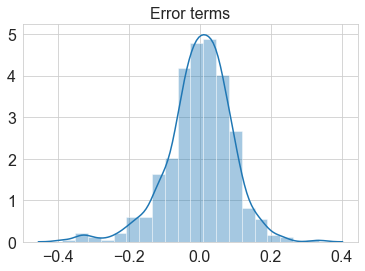

In [81]:
#plotting to see the errror terms

plt.title("Error terms", fontsize=16)
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.show()

#The error terms are normally distributed. This is validated with a distribution plot.

### ***Prediction on Test data***

In [82]:
#sacling on test data

cols_vars = ['temp','hum','windspeed','cnt'] #variables to be scaled

bikes_test[cols_vars] = scaler.transform(bikes_test[cols_vars])

In [83]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [84]:
#dropping const from X_train_new

X_train_new = X_train_new.drop('const', axis = 1)

In [85]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'september', 'cloudy', 'light rain'],
      dtype='object')

In [86]:
X_test_new = X_test[X_train_new.columns] #getting the same column as the final train data that is modelled

X_test_new = sm.add_constant(X_test_new)

In [87]:
X_test_new.head() #scaled test data

,const,yr,holiday,temp,hum,windspeed,summer,winter,september,cloudy,light rain
184,1.0000,0,1,0.8318,0.6574,0.0842,0,0,0,1,0
535,1.0000,1,0,0.9014,0.6101,0.1537,1,0,0,0,0
299,1.0000,0,0,0.5120,0.8377,0.3342,0,1,0,1,0
221,1.0000,0,0,0.8816,0.4371,0.3396,0,0,0,0,0
152,1.0000,0,0,0.8172,0.3143,0.5374,1,0,0,0,0


In [88]:
y_pred = lm_final.predict(X_test_new) #predicting the target variable based on the test data

In [89]:
#importing library to calculate r2

from sklearn.metrics import r2_score

r2_val = r2_score(y_test, y_pred) #r-squared value of test data

r2_val

0.8046410496371389

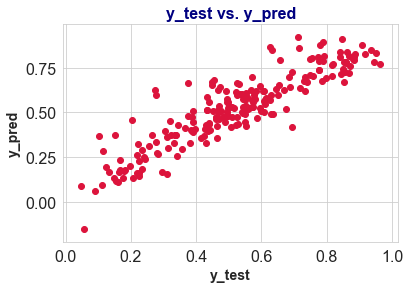

In [90]:
plt.title("y_test vs. y_pred", fontsize=16, weight='bold', color='navy')
plt.scatter(y_test, y_pred, color='crimson')
plt.xlabel("y_test",fontsize=14, weight='bold')
plt.ylabel("y_pred", fontsize=14, weight='bold')
plt.show()

#linear relationship between the dependent and independent variable(s). 
#This is checked using scatterplot between y_test and y_pred values; and the plot have a linearity.

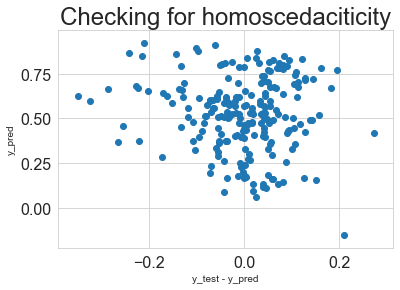

In [91]:
#checking for homoscedaciticity - if error terms are independent or not.

chk = y_test - y_pred
plt.scatter(chk, y_pred)
plt.title("Checking for homoscedaciticity")
plt.xlabel("y_test - y_pred")
plt.ylabel("y_pred")
plt.show()

#variance of residuals is constant; this means data have homoscedasticity. This can also be checked using a scatter plot. 
#No visible pattern is found.

***Final model summary***



- **`Final model consist of 10 variables excluding the constant. They are as follows:`** 
    1. temp
    2. yr
    3. light rain
    4. hum
    5. cloudy
    6. winter
    7. summer
    8. windspeed
    9. september
    10. holiday
- **`all variables have a p value of 0 which shows high significance`**
- **`all variables have low VIF value which implies there is no multicollinearity among the variables.`**
- **`adjusted R-squared value is 0.834 which indicates a good model`**
- **`all assumptions of multiple linear regression is validated.`**


- Considering the largest absolute value of coefficients, top three features are:

  1.temp --> absolute coefficient value 0.5706
  
  2.light rain --> absolute coefficient value 0.2367
  
  3.yr --> absolute coefficient value 0.2289
